# Binary classification machine learning  model

# 1. Load Required Libraries

In [129]:
import pandas as pd
import numpy as np

# 2. Load Data set

In [130]:
data = pd.read_csv("adult.csv")

In [131]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 3. Some details about dataset

### Null values

In [132]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

* No missing values in Adult dataset

### Data types

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


* There are two datatypes which are included such as "int64","object"

### Some statistical values

In [134]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Dimenstion

In [135]:
data.shape

(48842, 15)

* Number of records : 48842
* Number of variables : 15

### Column names

In [136]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Categorical data counts


In [137]:
categorical_variable = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_variable.append(i)
    else:
        pass

print(categorical_variable)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [138]:
for i in categorical_variable:
    print(data[i].value_counts(),"\n\n")

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64 


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64 


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-manager

# 4. Data pre-processing

### Dropping columns

In [139]:
data.drop(columns="education",axis=1,inplace=True) 

### One-Hot-encoding

In [140]:
encoded_variable = ["workclass","marital-status","occupation","relationship","race","native-country"]

In [141]:
new_data = pd.get_dummies(data, columns=encoded_variable, dtype="int64")

In [142]:
new_data.head(2)

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [143]:
new_data["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [144]:
new_data["gender"].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [145]:
new_data["income"] = new_data["income"].apply(lambda x : 0 if x == "<=50K" else 1)
new_data["gender"] = new_data["gender"].apply(lambda x : 1 if x == "Male" else 0)

In [146]:
new_data.head(4)

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


* There are no categorical feature columns

### Count of all feature column in new data set

In [147]:
column_names = new_data.columns.to_list()
len(column_names)

92

* There are large number of column. Now we check what are the most important columns related to income column.
* For that, we draw correlation between variables

### correlation 

In [148]:
new_data.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.026931,0.049867,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005625,-0.009996,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.079304,0.058072,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.064010,0.005861,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019062,-0.003633,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002557,-0.004309,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002051,0.001076,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005258,0.013956,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004052,-0.001509,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


### Correlation plot

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

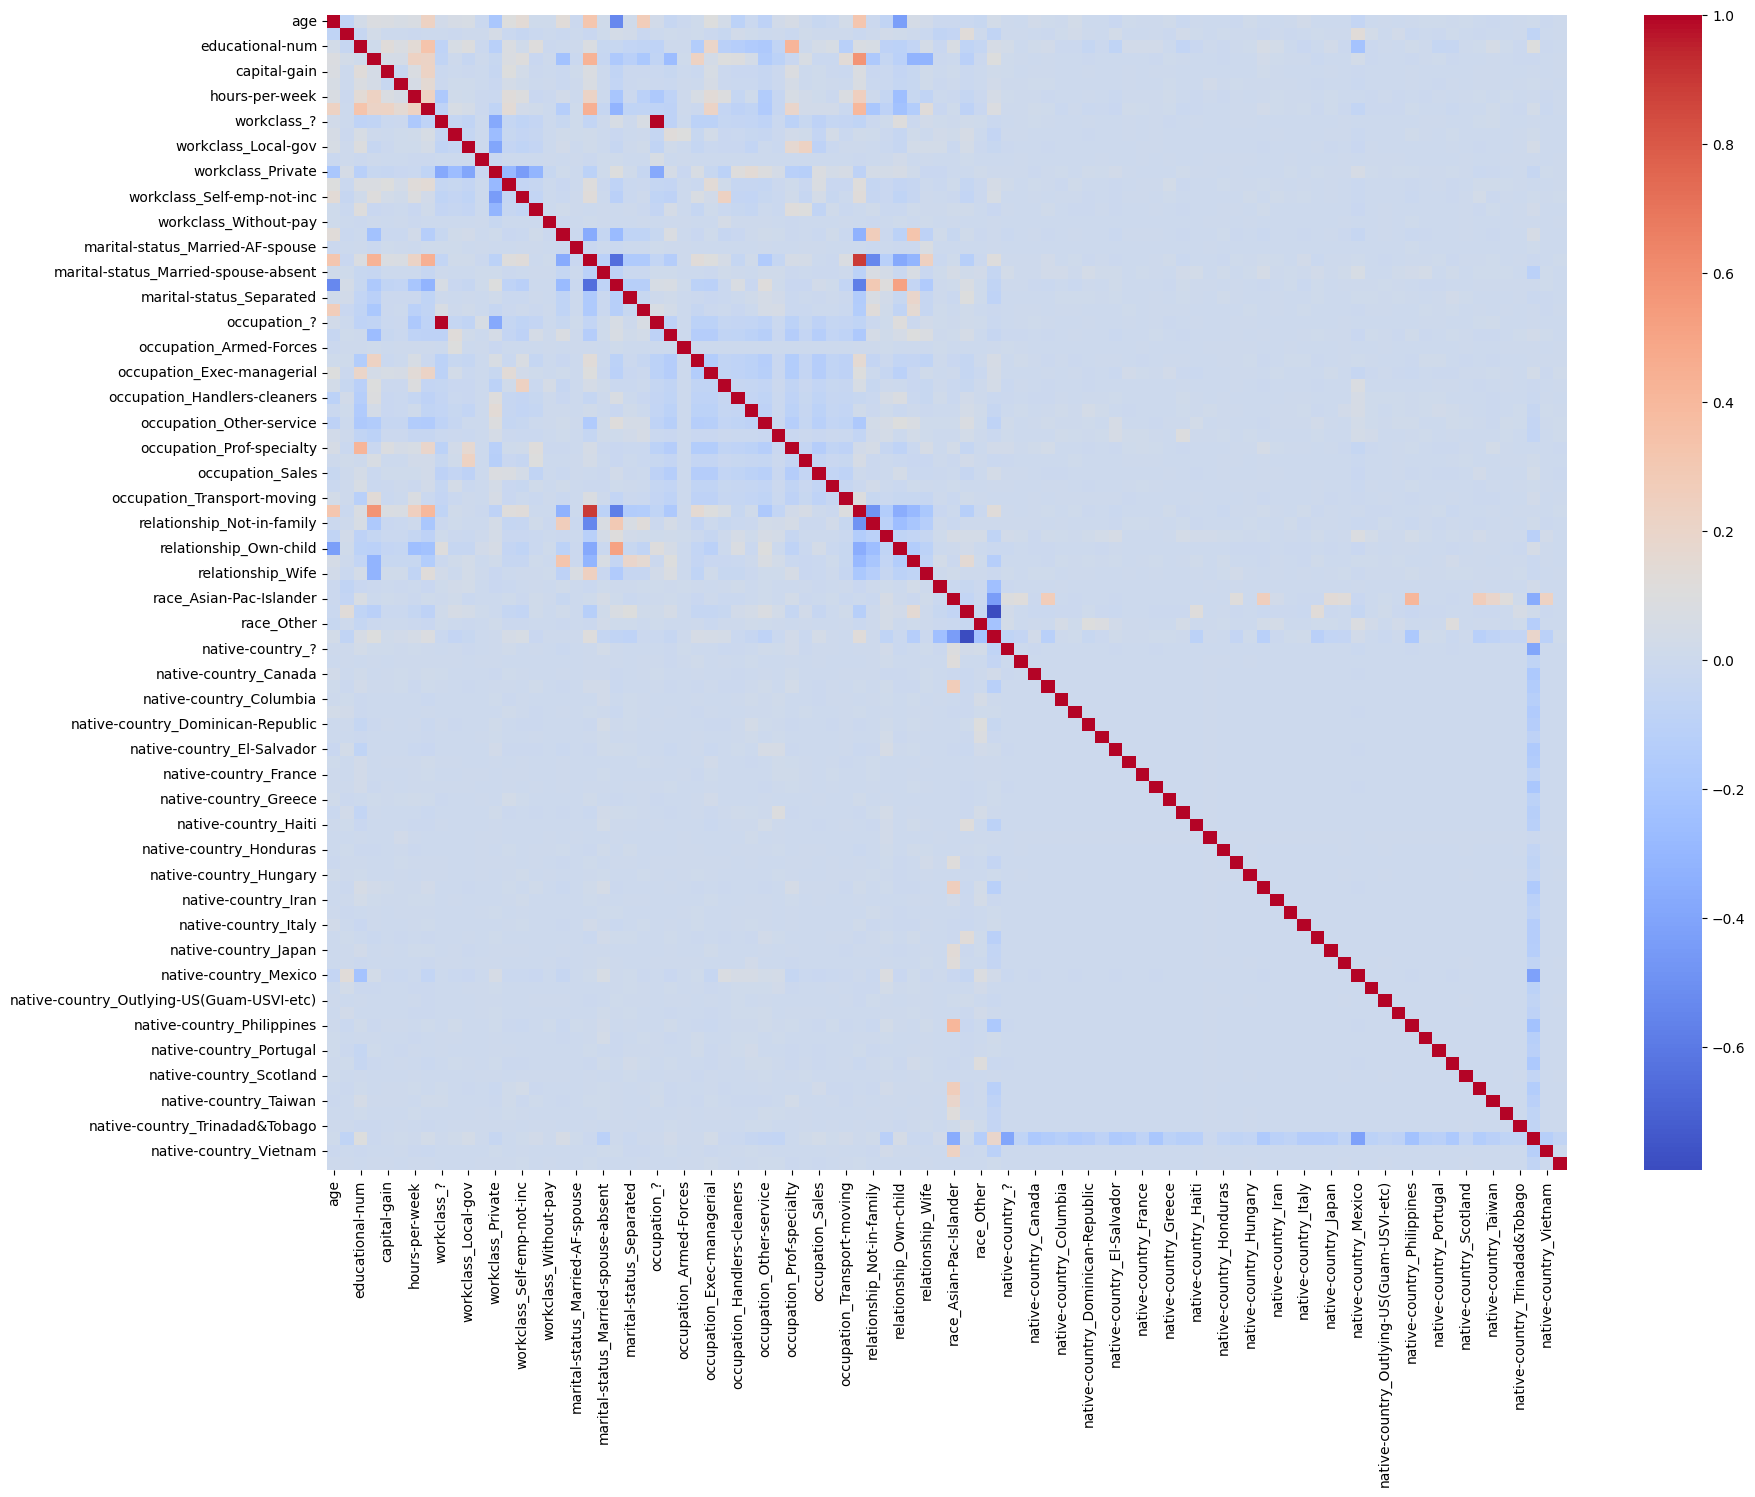

In [150]:
plt.figure(figsize=(20,15))
sns.heatmap(new_data.corr(), annot=False , cmap="coolwarm")

* Due to presense of many column, we cann't get direct information about column.
* Let's try to get column which are important  and which are not important 

In [151]:
correlation = new_data.corr()["income"].abs()
correlation.sort_values(inplace=True)

In [152]:
correlation

native-country_Cuba                  0.000885
native-country_Hong                  0.001591
native-country_Holand-Netherlands    0.002538
native-country_Hungary               0.003538
native-country_Ireland               0.003744
                                       ...   
marital-status_Never-married         0.318782
educational-num                      0.332613
relationship_Husband                 0.403791
marital-status_Married-civ-spouse    0.445853
income                               1.000000
Name: income, Length: 92, dtype: float64

In [153]:
number_of_dropped_column = int(0.8 * len(new_data.columns))

In [154]:
drop_colun = correlation.iloc[:number_of_dropped_column].index

In [155]:
reduced_newdata = new_data.drop(columns=drop_colun, axis=1)

In [156]:
reduced_newdata.head(4)

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,1,0,0,0,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,1,0,0,0,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,1,0,0,0,0,1,0,0,0,0


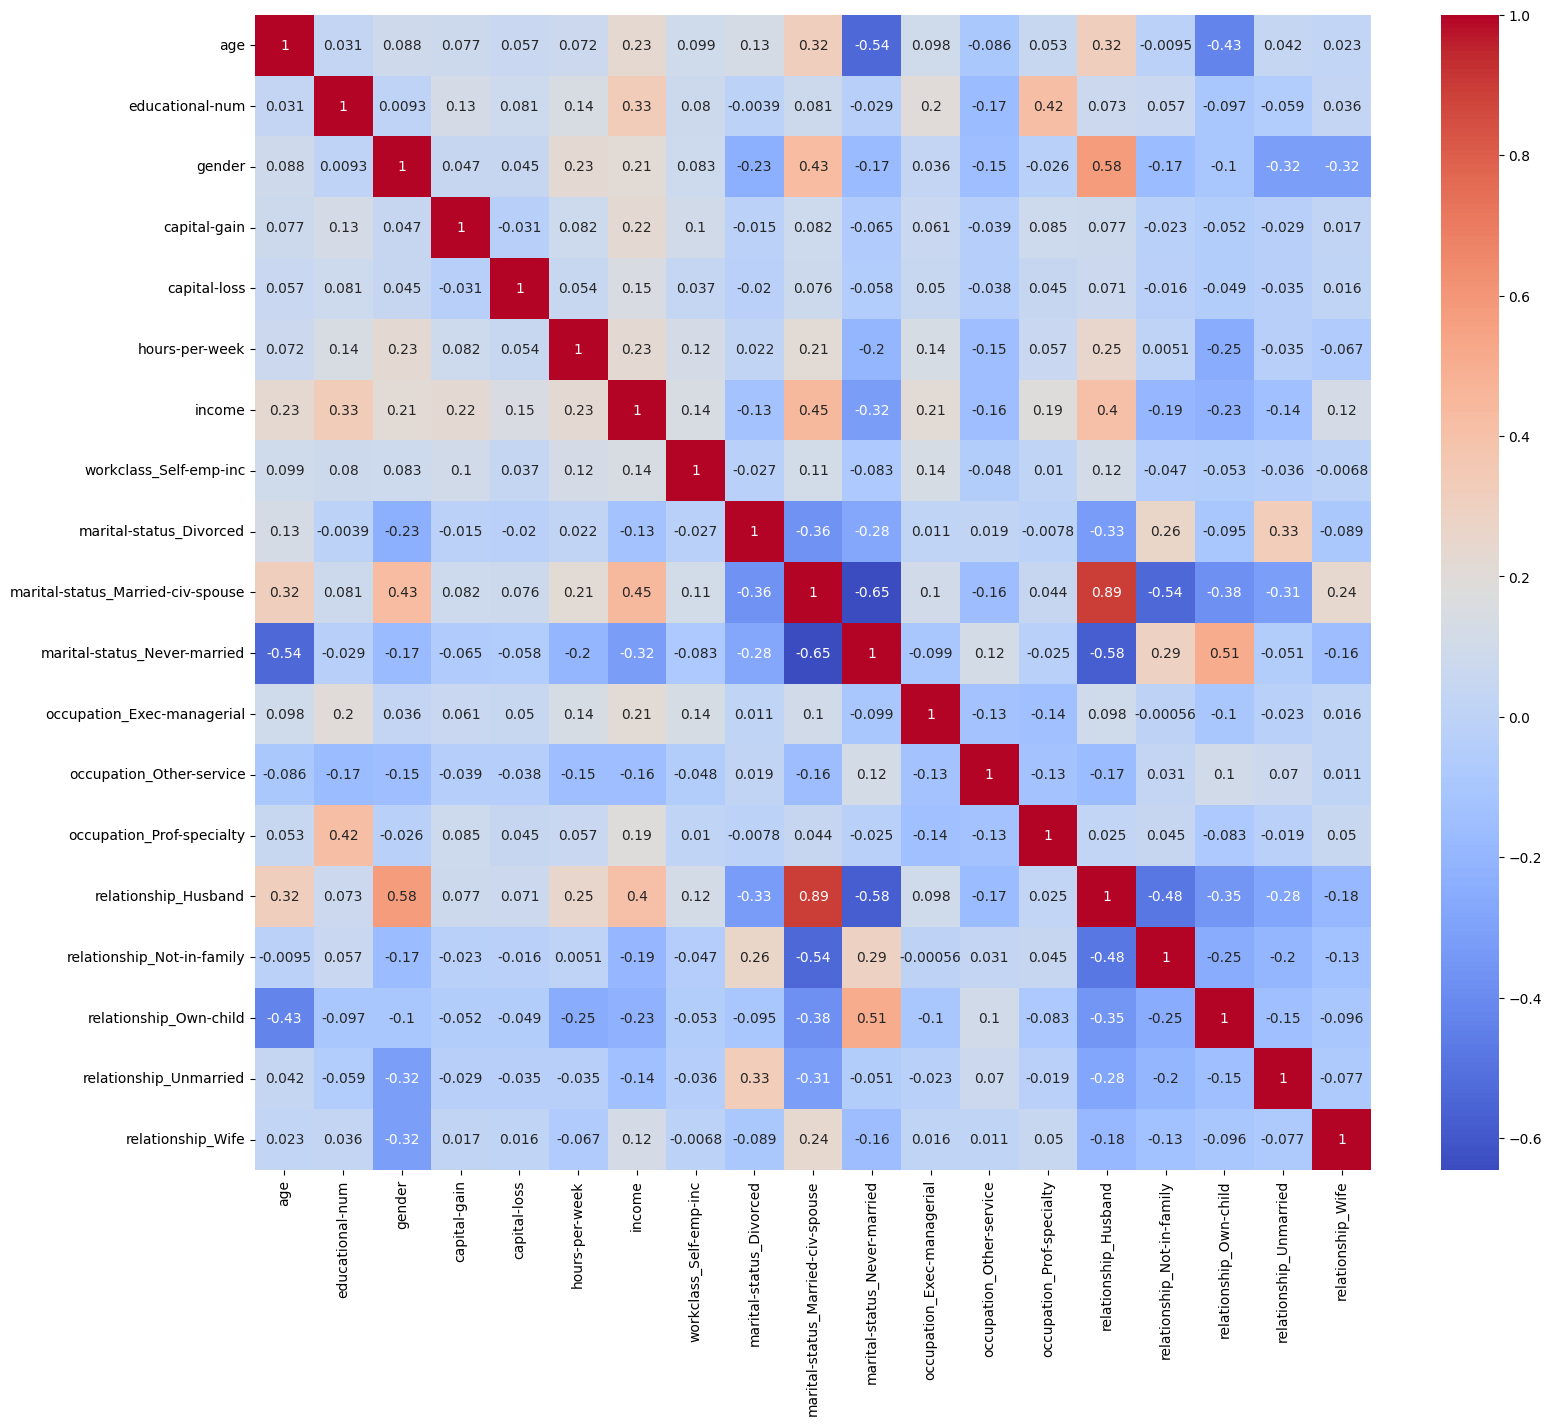

In [157]:
plt.figure(figsize=(18,15))
sns.heatmap(reduced_newdata.corr(), annot=True, cmap="coolwarm")
plt.show()

In [158]:
new_correaltion = reduced_newdata.corr()["income"].abs()
new_correaltion = new_correaltion.sort_values()
new_correaltion

relationship_Wife                    0.120484
marital-status_Divorced              0.128335
workclass_Self-emp-inc               0.139596
relationship_Unmarried               0.143642
capital-loss                         0.147554
occupation_Other-service             0.155254
occupation_Prof-specialty            0.188793
relationship_Not-in-family           0.190372
occupation_Exec-managerial           0.210938
gender                               0.214628
capital-gain                         0.223013
relationship_Own-child               0.225691
hours-per-week                       0.227687
age                                  0.230369
marital-status_Never-married         0.318782
educational-num                      0.332613
relationship_Husband                 0.403791
marital-status_Married-civ-spouse    0.445853
income                               1.000000
Name: income, dtype: float64

# Machine Learning model

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


## Train test split

In [160]:
train_data , test_data = train_test_split(reduced_newdata, test_size=0.2)

In [161]:
train_data


,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
36148,32,9,1,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0
29428,25,11,1,0,0,41,0,0,0,1,0,0,0,0,1,0,0,0,0
38293,28,10,1,0,0,50,0,0,0,0,1,1,0,0,0,1,0,0,0
30901,56,12,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,1
32247,24,9,0,0,0,50,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16218,34,9,1,0,0,50,1,1,1,0,0,0,0,0,0,0,0,1,0
43251,17,8,0,0,0,16,0,0,0,0,1,0,1,0,0,0,1,0,0
20477,76,5,1,0,0,40,0,1,0,1,0,0,0,1,1,0,0,0,0
23886,56,9,1,0,0,45,0,0,0,1,0,0,0,0,1,0,0,0,0


In [162]:
test_data

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
24616,56,10,0,0,0,35,0,0,1,0,0,0,0,0,0,1,0,0,0
27714,26,9,1,0,0,40,0,0,0,0,0,0,1,0,0,1,0,0,0
26767,20,10,0,0,0,35,0,0,0,0,1,0,0,0,0,1,0,0,0
8169,58,9,1,0,0,20,0,0,1,0,0,0,0,0,0,0,0,1,0
28331,54,13,0,0,1408,38,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48424,33,9,1,0,0,45,0,0,0,0,1,0,0,0,0,1,0,0,0
38158,28,10,0,0,0,40,0,0,1,0,0,1,0,0,0,1,0,0,0
23681,49,9,0,0,0,35,0,0,1,0,0,0,1,0,0,0,0,1,0
29970,40,9,0,6849,0,38,0,0,0,0,1,0,0,0,0,1,0,0,0


In [163]:
x_train = train_data.drop(columns="income",axis=1)
y_train = train_data["income"]

x_test = test_data.drop(columns="income",axis=1)
y_test = test_data["income"]

In [164]:
forest = RandomForestClassifier()

forest.fit(x_train,y_train)

RandomForestClassifier()

In [165]:
forest.score(x_test,y_test)

0.8475790766711024

## Feture importance of a model

In [166]:
forest.feature_importances_

array([0.22950308, 0.14649769, 0.00920759, 0.14119897, 0.0457812 ,
       0.13522563, 0.0079273 , 0.00546746, 0.11196443, 0.02370047,
       0.02287855, 0.00766976, 0.02072187, 0.06142157, 0.01017915,
       0.00859723, 0.0035046 , 0.00855345])

In [167]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Self-emp-inc',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife'], dtype=object)

In [168]:
importances = dict(zip(forest.feature_names_in_ , forest.feature_importances_))
importances

{'age': 0.22950307649777954,
 'educational-num': 0.14649769438078195,
 'gender': 0.009207589777198549,
 'capital-gain': 0.14119897145958865,
 'capital-loss': 0.045781198579602556,
 'hours-per-week': 0.1352256316103745,
 'workclass_Self-emp-inc': 0.007927295195377196,
 'marital-status_Divorced': 0.005467462406718399,
 'marital-status_Married-civ-spouse': 0.11196443142218167,
 'marital-status_Never-married': 0.023700469987331437,
 'occupation_Exec-managerial': 0.022878553058078715,
 'occupation_Other-service': 0.007669756626209825,
 'occupation_Prof-specialty': 0.020721869111199172,
 'relationship_Husband': 0.061421567923798576,
 'relationship_Not-in-family': 0.010179152720353246,
 'relationship_Own-child': 0.008597228978533995,
 'relationship_Unmarried': 0.003504600445189981,
 'relationship_Wife': 0.008553449819702038}

In [204]:
importances_sorted = {k: v for k,v in sorted(importances.items(), key= lambda x : x[1], reverse=True)}
importances_sorted

{'age': 0.22950307649777954,
 'educational-num': 0.14649769438078195,
 'capital-gain': 0.14119897145958865,
 'hours-per-week': 0.1352256316103745,
 'marital-status_Married-civ-spouse': 0.11196443142218167,
 'relationship_Husband': 0.061421567923798576,
 'capital-loss': 0.045781198579602556,
 'marital-status_Never-married': 0.023700469987331437,
 'occupation_Exec-managerial': 0.022878553058078715,
 'occupation_Prof-specialty': 0.020721869111199172,
 'relationship_Not-in-family': 0.010179152720353246,
 'gender': 0.009207589777198549,
 'relationship_Own-child': 0.008597228978533995,
 'relationship_Wife': 0.008553449819702038,
 'workclass_Self-emp-inc': 0.007927295195377196,
 'occupation_Other-service': 0.007669756626209825,
 'marital-status_Divorced': 0.005467462406718399,
 'relationship_Unmarried': 0.003504600445189981}

## Hyper-parameter tuning

### Grid search algorithm

In [170]:
from sklearn.model_selection  import GridSearchCV

In [183]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,15],
    'min_samples_split': [2,4]
}

grid_serach = GridSearchCV(estimator = RandomForestClassifier() , 
                           param_grid= param_grid ,
                            verbose = 10 )

In [184]:
grid_serach.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_depth=10, min_samples_split=2, n_estimators=100.........
[CV 1/5; 1/8] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.857 total time=   1.0s
[CV 2/5; 1/8] START max_depth=10, min_samples_split=2, n_estimators=100.........
[CV 2/5; 1/8] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.862 total time=   1.0s
[CV 3/5; 1/8] START max_depth=10, min_samples_split=2, n_estimators=100.........
[CV 3/5; 1/8] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.862 total time=   1.1s
[CV 4/5; 1/8] START max_depth=10, min_samples_split=2, n_estimators=100.........
[CV 4/5; 1/8] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.857 total time=   1.0s
[CV 5/5; 1/8] START max_depth=10, min_samples_split=2, n_estimators=100.........
[CV 5/5; 1/8] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.863 total time=   1.7s
[CV 1/5; 2/8] START 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             verbose=10)

In [185]:
grid_serach.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=200)

In [186]:
forest = grid_serach.best_estimator_

forest.score(x_test,y_test)

0.8668236257549391

### Feature importance

In [205]:
importance_2 = dict(zip(forest.feature_names_in_ , forest.feature_importances_))

In [207]:
importance_2_sorted = {k: v for k,v in sorted(importance_2.items() , key=lambda x : x[1], reverse=True)}
importance_2_sorted

{'capital-gain': 0.18844012369435825,
 'educational-num': 0.16368275005647895,
 'marital-status_Married-civ-spouse': 0.14593589493134992,
 'age': 0.10570393485521487,
 'relationship_Husband': 0.09998184983239732,
 'hours-per-week': 0.07445650761285139,
 'capital-loss': 0.05784183855570713,
 'marital-status_Never-married': 0.03340370919101083,
 'occupation_Exec-managerial': 0.029434171342754185,
 'occupation_Prof-specialty': 0.025017507244201032,
 'relationship_Wife': 0.016178924723374698,
 'gender': 0.012843329675338794,
 'relationship_Not-in-family': 0.01181184160383598,
 'occupation_Other-service': 0.009084914064736703,
 'relationship_Own-child': 0.008281374418932166,
 'workclass_Self-emp-inc': 0.007397869285820766,
 'marital-status_Divorced': 0.006498580979929942,
 'relationship_Unmarried': 0.0040048779317072665}